# Loading The Dataset

## VISIT : https://github.com/Debjeet-Das/People_Charm

In [1]:
import pandas as pd
import numpy as np
data= pd.read_csv("People Charm case.csv")
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


# EDA :
  - Checking the shape of the data
  - Checking the dtype of each column in the dataset.
  - Treating the Null or missing values in the dataset.
  - Checking the Skewness of the data.
  - Checking wether the data is imbalanced or not.
  - Checking for outliers in the dataset.

In [2]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
# checking the null values in the dataset
data.isnull().sum()/len(data)

satisfactoryLevel        0.0
lastEvaluation           0.0
numberOfProjects         0.0
avgMonthlyHours          0.0
timeSpent.company        0.0
workAccident             0.0
left                     0.0
promotionInLast5years    0.0
dept                     0.0
salary                   0.0
dtype: float64

# Box plot for checking the outliers in the dataset:
   - Here we can see that there are outliers in the timespent.company column in the dataset.
   - thus we treat the outliers by capping method.

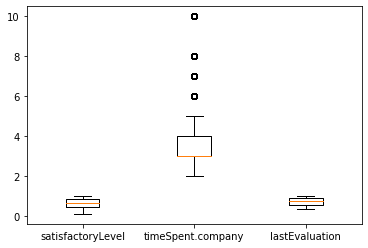

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot([data["satisfactoryLevel"],data["timeSpent.company"],data["lastEvaluation"]])
plt.xticks([1,2,3],["satisfactoryLevel","timeSpent.company","lastEvaluation"])
plt.show()

In [5]:
# Capping the outliers
Q1 = data["timeSpent.company"].quantile(0.25)
Q3 = data["timeSpent.company"].quantile(0.75)
IQR = Q3 - Q1
out_ls=[]
for i in data["timeSpent.company"]:
    if(i<Q1-(1.5*IQR)):
        i=Q1-(1.5*IQR)
        out_ls.append(i)
    elif (i>Q3+(1.5*IQR)):
        i=Q3+(1.5*IQR)
        out_ls.append(i)
    else:
        out_ls.append(i)

In [6]:
# Dropping the original column which had outliers and adding a new column with the capped values for the outliers.

data=data.drop(columns=["timeSpent.company"])
data["timeSpent.company"]=out_ls

In [7]:
# Salary count on compared with the target variable
salarycount=data.pivot_table(index= ["dept"],values ="left",aggfunc=np.size).sort_values(by="left",ascending = False)
salarycount

,left
dept,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [8]:
# dept. substituted by the count corresponding to its output

salarycount=data.pivot_table(index= ["dept"],values ="left",aggfunc=np.size).sort_values(by="left",ascending = False)
salaryseries= pd.Series(salarycount["left"],index=salarycount.index)
data["dept"]=data["dept"].map(salaryseries)
data["dept"]

0        4140
1        4140
2        4140
3        4140
4        4140
         ... 
14994    2229
14995    4140
14996    2720
14997    4140
14998    2229
Name: dept, Length: 14999, dtype: int64

In [9]:
# label encoding on the numerically converted data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["dept"]=le.fit_transform(data["dept"])


In [10]:
# unique values in dept column after encoding
data["dept"].unique()

array([9, 2, 1, 8, 7, 6, 5, 4, 0, 3], dtype=int64)

In [11]:
# salary count when compared to the target variable
salarycount2=data.pivot_table(index= ["salary"],values ="left",aggfunc=np.size).sort_values(by="left",ascending = False)
salarycount2

,left
salary,
low,7316
medium,6446
high,1237


In [12]:
# substituting salary with count of target variable on compared with salary
salarycount2=data.pivot_table(index= ["salary"],values ="left",aggfunc=np.size).sort_values(by="left",ascending = False)
salaryseries2= pd.Series(salarycount2["left"],index=salarycount2.index)
data["salary"]=data["salary"].map(salaryseries2)
data["salary"]

0        7316
1        6446
2        6446
3        7316
4        7316
         ... 
14994    6446
14995    7316
14996    7316
14997    7316
14998    7316
Name: salary, Length: 14999, dtype: int64

In [13]:
# Unique values in salary column after converting its categories into nemrical count of when compared with output variable
data["salary"].unique()

array([7316, 6446, 1237], dtype=int64)

In [14]:
# Label encoding the numerical transformed variable salary
le=LabelEncoder()
data["salary"]=le.fit_transform(data["salary"])

In [15]:
# unique values after label encoding
data["salary"].unique()

array([2, 1, 0], dtype=int64)

# Importing the Libraries:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# creating the target variable column at the end and dropping the duplicate
data["Target_left"]=data["left"]
data=data.drop("left",axis=1)

# Checking the correlation:
   - correlation is checked using the heatmap.
   - Using only highly correlated variables for further modelling.

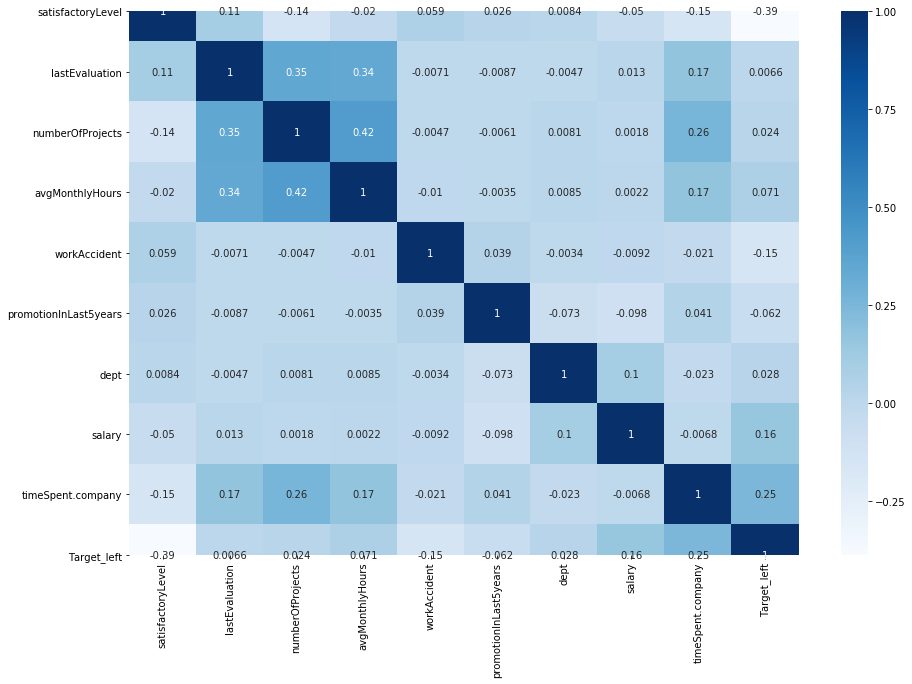

In [86]:
# checking the corelation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

# Skewness in the data:
   - Here we are using distplot from seaborn in order to see the skewness in the data visually. 

<function matplotlib.pyplot.show(*args, **kw)>

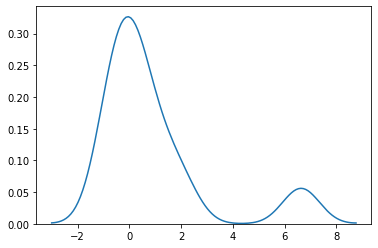

In [87]:
sns.distplot(data.skew(),hist=False)
plt.show

# Checking the imbalanced Data:
   - In the below graph we can easily see that the data has imbalanced classification.
   - The data is imbalanced by the ratio of 3:1
   - 76% of belongs to the class-0 and 24% belongs to class-1.


Text(0.5, 1.0, ' Class Frequncy')

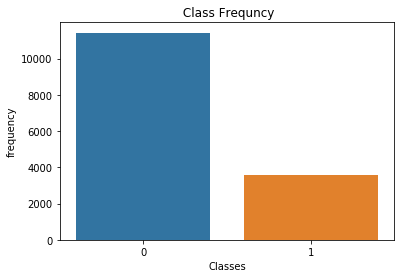

In [88]:
import seaborn as sns
sns.countplot(data["Target_left"])
plt.xlabel("Classes")
plt.ylabel("frequency")
plt.title(" Class Frequncy")

# Data Splitting:
   - Data is splitted by keeping 20% of data for testing and remaining for training.
   - random_state is used for evaluation of the model on the same samples of train and test set.
   - Also we have splitted the log transformed data into train/test for GaussianNb model as it works best with such data.

In [89]:
# splitting the model into training & testing datasets
real_x = data[["satisfactoryLevel","salary","workAccident","timeSpent.company","avgMonthlyHours","promotionInLast5years","numberOfProjects"]]
real_y = data.iloc[:,-1]
log_x= data[["satisfactoryLevel","salary","workAccident","timeSpent.company","avgMonthlyHours","promotionInLast5years","numberOfProjects"]].apply(lambda x : np.log(x+1))
trainxl,testxl,trainyl,testyl = train_test_split(log_x,real_y,test_size=0.2,random_state = 42)
trainx,testx,trainy,testy = train_test_split(real_x,real_y,test_size=0.2,random_state = 42)

# List of classification models used for fitting   :
   - KNNClassifier
   - GaussianNB
   - AdaBoost
   - GradientBoost
   - XGBoost
   - DecisionTree
   - RandomForest
   - LogisticRegression

## KNN Algorithm :

confusion matrix :
[[2190   82]
 [  35  693]]
Accuracy : 
0.961
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2272
           1       0.89      0.95      0.92       728

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



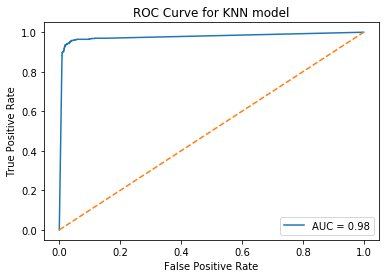

In [90]:
# KNN
# performing model fitting on the skewed  and unscaled data
knn= KNeighborsClassifier(n_neighbors =9,weights='distance')
knn.fit(trainx,trainy)
knn_pred = knn.predict(testx)
knn_conf = confusion_matrix(testy,knn_pred)
knn_accuracy = accuracy_score(testy,knn_pred)
print("confusion matrix :" ,knn_conf,sep="\n")
print("Accuracy : ",knn_accuracy,sep="\n")
print("Classification Report : ",classification_report(testy,knn_pred),sep="\n")

pred_probknn = knn.predict_proba(testx)
auc_knn= roc_auc_score(testy,pred_probknn[:,1])
fprkn,tprkn,thresholdskn = roc_curve(testy,pred_probknn[:,1])
plt.plot(fprkn,tprkn,label="AUC = %.2f" %  auc_knn )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN model")
plt.plot([0,1],[0,1],"--")
plt.legend()

In [91]:
# KNN
# performing model fitting on the log transformed
knn= KNeighborsClassifier(n_neighbors =9,weights='distance')
knn.fit(trainxl,trainyl)
knn_predl = knn.predict(testxl)
knn_confl = confusion_matrix(testyl,knn_predl)
knn_accuracyl = accuracy_score(testyl,knn_predl)
print("confusion matrix :" ,knn_confl,sep="\n")
print("Accuracy : ",knn_accuracyl,sep="\n")
print("Classification Report : ",classification_report(testyl,knn_predl),sep="\n")

confusion matrix :
[[2233   39]
 [  33  695]]
Accuracy : 
0.976
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2272
           1       0.95      0.95      0.95       728

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



## Gaussian NB :

confusion matrix :
[[1865  407]
 [ 179  549]]
Accuracy : 
0.8046666666666666
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2272
           1       0.57      0.75      0.65       728

    accuracy                           0.80      3000
   macro avg       0.74      0.79      0.76      3000
weighted avg       0.83      0.80      0.81      3000



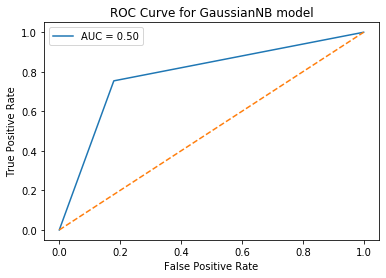

In [92]:
# Gaussian NB
# performing model fitting log transformed
gnb= GaussianNB()
gnb.fit(trainxl,trainyl)
gnb_predl = gnb.predict(testxl)
gnb_confl = confusion_matrix(testyl,gnb_predl)
gnb_accuracyl= accuracy_score(testyl,gnb_predl)
print("confusion matrix :" ,gnb_confl,sep="\n")
print("Accuracy : ",gnb_accuracyl,sep="\n")
print("Classification Report : ",classification_report(testyl,gnb_predl),sep="\n")

pred_probgnb = gnb.predict_proba(testx)
auc_gnb = roc_auc_score(testy,pred_probgnb[:,1])
fprgnb,tprgnb,thresholdsgnb = roc_curve(testy,gnb_predl)
plt.plot(fprgnb,tprgnb,label="AUC = %.2f" %  auc_gnb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for GaussianNB model")
plt.plot([0,1],[0,1],"--")
plt.legend()

## ADABOOST :

confusion matrix : 
[[2238   34]
 [  31  697]]
Accuracy : 
0.9783333333333334
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2272
           1       0.95      0.96      0.96       728

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



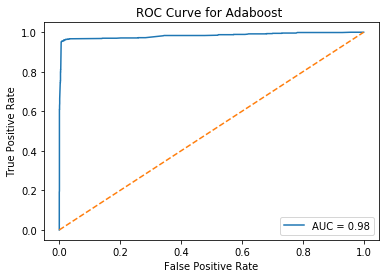

In [93]:
# ADABOOST
# performing model fitting on the skewed  and unscaled data
from sklearn.tree import DecisionTreeClassifier
ab= AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=10,learning_rate=1.0,random_state=3)
ab.fit(trainx,trainy)
ab_pred = ab.predict(testx)
ab_conf = confusion_matrix(testy,ab_pred)
ab_accuracy= accuracy_score(testy,ab_pred)
print("confusion matrix : " ,ab_conf,sep="\n")
print("Accuracy : ",ab_accuracy,sep="\n")
print("Classification Report : ",classification_report(testy,ab_pred),sep="\n")

pred_probab = ab.predict_proba(testx)
auc_ab = roc_auc_score(testy,pred_probab[:,1])
fprab,tprab,thresholdsab = roc_curve(testy,pred_probab[:,1])
plt.plot(fprab,tprab,label = "AUC = %.2f" % auc_ab)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Adaboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

## GradientBOOST :

confusion matrix :
[[2232   40]
 [  64  664]]
Accuracy : 
0.9653333333333334
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2272
           1       0.94      0.91      0.93       728

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



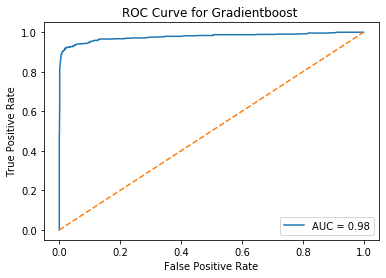

In [94]:
# GradientBOOST
# performing model fitting on the skewed  and unscaled data
from sklearn.tree import DecisionTreeClassifier
gb= GradientBoostingClassifier(n_estimators=10,learning_rate=0.9)
gb.fit(trainx,trainy)
gb_pred = gb.predict(testx)
gb_conf = confusion_matrix(testy,gb_pred)
gb_accuracy = accuracy_score(testy,gb_pred)
print("confusion matrix :" ,gb_conf,sep="\n")
print("Accuracy : ",gb_accuracy,sep="\n")
print("Classification Report : ",classification_report(testy,gb_pred),sep="\n")

pred_probgb = gb.predict_proba(testx)
auc_gb = roc_auc_score(testy,pred_probgb[:,1])
fprgb,tprgb,thresholdsgb = roc_curve(testy,pred_probgb[:,1])
plt.plot(fprgb,tprgb,label = "AUC = %.2f" % auc_gb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradientboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

## XGBOOST :

confusion matrix :
[[2245   27]
 [  32  696]]
Accuracy : 
0.9803333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2272
           1       0.96      0.96      0.96       728

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



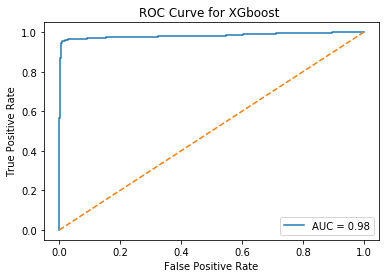

In [95]:
# XGBOOST
# performing model fitting on the skewed  and unscaled data
xgb= XGBClassifier(n_estimators=800,learning_rate=0.8)
xgb.fit(trainx,trainy)
xgb_pred = xgb.predict(testx)
xgb_conf = confusion_matrix(testy,xgb_pred)
xgb_accuracy = accuracy_score(testy,xgb_pred)
print("confusion matrix :" ,xgb_conf,sep="\n")
print("Accuracy : ",xgb_accuracy,sep="\n")
print("Classification Report : ",classification_report(testy,xgb_pred),sep="\n")


pred_prob_xgb = xgb.predict_proba(testx)
auc_xgb = roc_auc_score(testy,pred_prob_xgb[:,1])
fprxgb,tprxgb,thresholdsxgb = roc_curve(testy,pred_prob_xgb[:,1])
plt.plot(fprxgb,tprxgb,label = "AUC = %.2f" % auc_xgb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Decision Tree :

confusion matrix :
[[2240   32]
 [  29  699]]
Accuracy : 
0.9796666666666667
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2272
           1       0.96      0.96      0.96       728

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



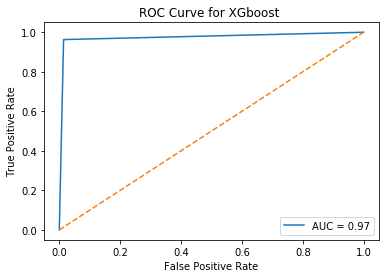

In [96]:
# Decision Tree
# performing model fitting on the skewed  and unscaled data
DT= DecisionTreeClassifier(criterion="entropy",max_depth=32)
DT.fit(trainx,trainy)
DT_pred = DT.predict(testx)
DT_conf = confusion_matrix(testy,DT_pred)
DT_accuracy = accuracy_score(testy,DT_pred)
print("confusion matrix :" ,DT_conf,sep="\n")
print("Accuracy : ",DT_accuracy,sep="\n")
print("Classification Report : ",classification_report(testy,DT_pred),sep="\n")


pred_prob_DT = DT.predict_proba(testx)
auc_DT = roc_auc_score(testy,pred_prob_DT[:,1])
fprDT,tprDT,thresholdsDT = roc_curve(testy,pred_prob_DT[:,1])
plt.plot(fprDT,tprDT,label = "AUC = %.2f" % auc_DT)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

## RandomForest :

confusion matrix :
[[2258   14]
 [  41  687]]
Accuracy : 
0.9816666666666667
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2272
           1       0.98      0.94      0.96       728

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



C:\Users\Debjeet Das\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


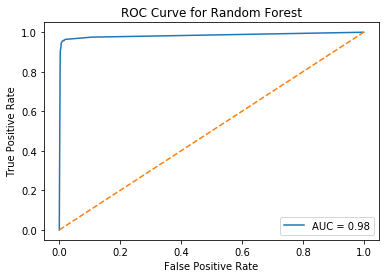

In [97]:
# RandomForest
rf= RandomForestClassifier(criterion="entropy",max_depth=32)
rf.fit(trainx,trainy)
rf_pred = rf.predict(testx)
rf_conf = confusion_matrix(testy,rf_pred)
rf_accuracy = accuracy_score(testy,rf_pred)

from sklearn.metrics import roc_curve ,roc_auc_score

pred_prob_rf = rf.predict_proba(testx)
auc_rf = roc_auc_score(testy,pred_prob_rf[:,1])
fprrf,tprrf,thresholdsrf = roc_curve(testy,pred_prob_rf[:,1])


print("confusion matrix :" ,rf_conf,sep="\n")
print("Accuracy : ",rf_accuracy,sep="\n")
print("Classification Report : ",classification_report(testy,rf_pred),sep="\n")

import matplotlib.pyplot as plt
plt.plot(fprrf,tprrf,label = "AUC = %.2f" % auc_rf)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Logistic :

confusion matrix :
[[1753  519]
 [ 122  606]]
Accuracy : 
0.7863333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.77      0.85      2272
           1       0.54      0.83      0.65       728

    accuracy                           0.79      3000
   macro avg       0.74      0.80      0.75      3000
weighted avg       0.84      0.79      0.80      3000

Area under the curve is 0.8413002050766136


C:\Users\Debjeet Das\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


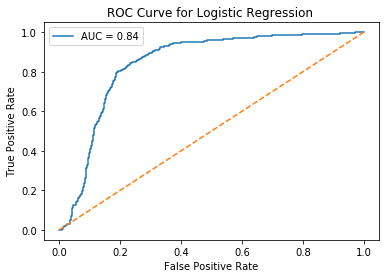

In [48]:
# Performing logistic regression on the training data
log=LogisticRegression(class_weight="balanced")
log.fit(trainx,trainy)
log_pred = log.predict(testx)
log_conf = confusion_matrix(testy,log_pred)
log_accuracy = accuracy_score(testy,log_pred)
print("confusion matrix :" ,log_conf,sep="\n")
print("Accuracy : ",log_accuracy,sep="\n")
print("Classification Report : ",classification_report(testy,log_pred),sep="\n")

from sklearn.metrics import roc_curve ,roc_auc_score

pred_prob_log = log.predict_proba(testx)

fpr,tpr,thresholds = roc_curve(testy,pred_prob_log[:,1])
logit_roc_auc = roc_auc_score(testy,pred_prob_log[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "AUC = %.2f" % logit_roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression ")
plt.plot([0,1],[0,1],"--")
plt.legend()

print("Area under the curve is {}".format(logit_roc_auc))

## Changing the Threshold Value of logistic reg :
   -  By looking at the graph we can see the threshold value at (0.25 , 0.85) fpr,tpr shows better results for this data.
   -  Because for this threshold tpr is 0.85 and fpr is very less,that is 0.25 which is an ideal condition.
   -  After changing the threshold value,by comparing the before and after confusion matrices respectively.
   -  We can see that the False positive values have gone down. Which makes our model more reliable. 
   -  We use binarize to set the threshold to a desired value to reduce the False positive values.
   -  binarize takes  2 arguments - binarize([predicted_proba],threshold = 0.47)

In [75]:
# thus we will use this threshold value for the logistic regression

threshold_df = pd.DataFrame({"fpr":fpr.round(2),"tpr":tpr.round(2),"Threshold":thresholds.round(2)})
threshold_df[(threshold_df["fpr"]==0.25) & (threshold_df["tpr"]==0.85)]

,fpr,tpr,Threshold
578,0.25,0.85,0.48
579,0.25,0.85,0.47
580,0.25,0.85,0.47


In [76]:
# These are the predicted probabilities
probabilities= log.predict_proba(testx)
probabilities

array([[0.31030504, 0.68969496],
       [0.75441768, 0.24558232],
       [0.42217862, 0.57782138],
       ...,
       [0.9564227 , 0.0435773 ],
       [0.09004288, 0.90995712],
       [0.18127756, 0.81872244]])

In [85]:
# We use binarize to set the threshold to a desired values to reduce the FPR.
# binarize takes  2 arguments- binarize([predicted_proba],threshold = 0.47)

from sklearn.preprocessing import binarize
pred_prob = probabilities[:,1]
pred_new_y = binarize([pred_prob],threshold =0.47)
pred_new_y=pred_new_y.flatten()

# Now we use this new predicted values which were determined by using 0.47 as threshold values for prediction of model
# Here we can see the False positives has reduced, also there is a reduction in the in the accuracy

log_accuracy_new = accuracy_score(testy,pred_new_y)
log_conf_new = confusion_matrix(testy,pred_new_y)
print("confusion matrix :" ,log_conf_new,sep="\n")
print("Accuracy : ",log_accuracy_new,sep="\n")
print("Classification Report : ",classification_report(testy,pred_new_y),sep="\n")

confusion matrix :
[[1707  565]
 [ 109  619]]
Accuracy : 
0.7753333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      2272
           1       0.52      0.85      0.65       728

    accuracy                           0.78      3000
   macro avg       0.73      0.80      0.74      3000
weighted avg       0.84      0.78      0.79      3000



## AUC & Accuracy DataFrame for each model :
   - From the below model we can see the area under the curve for Xgboost model is highest amongst all.
   - Thus is this is also a valid pefromance metric as this model has the highest AUC for this dataset.
   - But these are the model parameters where samples used for train/test are imbalanced.
   - Here the model is showing better prediction for a certain random_state.
   - But when we change the random_state the accuracy as well as the auc decreases.
   - Hence using each model score individually for a particular samples of train/test set cant be validated.

In [78]:
list_ac=[xgb_pred,gb_pred,ab_pred,gnb_predl,knn_pred,DT_pred,rf_pred,pred_new_y]
list_area=[]
list_acc= []
for i in list_ac:
    list_acc.append(accuracy_score(testy,i))
    list_area.append(roc_auc_score(testy,i))
    
area_auc_DF = pd.DataFrame({"model":["XGBoost","GradientBoost","AdaBoost","GaussianNB","KNNClassifier","DecisionTree","RandomForest","LogisticRegression"],"AUC":list_area,"Accuracy":list_acc}) 
area_auc_DF.sort_values(by=["AUC","Accuracy"],ascending=[False,False]) 

,model,AUC,Accuracy
0,XGBoost,0.972080,0.980333
6,RandomForest,0.971947,0.983667
5,DecisionTree,0.971913,0.978667
2,AdaBoost,0.971226,0.978333
4,KNNClassifier,0.957916,0.961000
1,GradientBoost,0.947241,0.965333
7,LogisticRegression,0.800798,0.775333
3,GaussianNB,0.787492,0.804667


## K-Fold Cross Validation :
   - Here we are deviding the dataset into k-folds.
   - Then using these k-folds we are taking each fold as a test sample and all the other folds as training set.
   - Thus every fold is iterable until all the folds have once been used for testing set
   - Hence even if there is imbalanced data distribution, all the combinations of samples will be considered for modelling.
   - After this we will take the average of all the accuracies which we got for a model.
   - Thus the average accuracy of the model,considering all the sample combinations for training/testing is done.
   - Hence we can validate the performance of the model using this parameter.

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
# CROSS VALIDATION SCORE FOR LOGISTIC :

list1=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),XGBClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),GaussianNB()]
ls=[]
for i in list1:
    c= cross_val_score(i,real_x,real_y,cv=7)
    ls.append(c)

C:\Users\Debjeet Das\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Debjeet Das\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Debjeet Das\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Debjeet Das\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Debjeet Das\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [81]:
# Calculating the mean accuracy for each classification model:
mean_acc=[]
for i in ls:
    mean_acc.append(i.mean())

In [82]:
# mean accuracy of models:
mean_acc

[0.7877156031968647,
 0.9863316610100765,
 0.9427959359175425,
 0.970397583475575,
 0.9514634258924317,
 0.970197534565048,
 0.9773321355551365,
 0.8116529122624271]

## MODEL  & AVG_ACCURACY  DATAFRAME AFTER K-FOLD CROSSVALIDATION :
   - The below Dataframe shows the models and its corressponding average accuracy using K-Fold Cross validation.
   - The highest accuracy is obtained by using Random Forest Algorithm which was tested using 7 folds.

In [83]:
# Creating dataframe with models and average mean using K-fold Cross validation
list4=["LogisticRegression","RandomForestClassifier","KNeighborsClassifier","XGBClassifier","AdaBoostClassifier","GradientBoostingClassifier","DecisionTreeClassifier","GaussianNB"]

model_df=pd.DataFrame({"Model":list4,"Avg_Accuracy":mean_acc})
model_df.sort_values(by= "Avg_Accuracy",ascending=False)

,Model,Avg_Accuracy
1,RandomForestClassifier,0.986332
6,DecisionTreeClassifier,0.977332
3,XGBClassifier,0.970398
5,GradientBoostingClassifier,0.970198
4,AdaBoostClassifier,0.951463
2,KNeighborsClassifier,0.942796
7,GaussianNB,0.811653
0,LogisticRegression,0.787716


# PROJECT OVERVIEW :

### Exploratory Data Analysis  :
  - Checking the shape of the data
  - Checking the dtype of each column in the dataset.
  - Treating the Null or missing values in the dataset.
  - Checking the Skewness of the data.
  - Checking wether the data is imbalanced or not.
  - Treating the outliers in the dataset.
  
### Checking the Correlation & Skewness :
   - correlation is checked using the heatmap.
   - Using only highly correlated variables for further modelling.
   - from the graph plotted above we can infer that the data is heavily right skewed.
   
### Data Splitting :
   - Data is splitted by keeping 20% of data for testing and remaining for training.
   - random_state is used for evaluation of the model on the same samples of train and test set.
   - Also we have splitted the log transformed data into train/test for GaussianNb model as it works best with such data.
   
### Checking the Data balance  :
   - In the above dataset the percentage of class-1 is very much lower than that of class-0.
   - Here the total weightage of class-0 is 76% whereas for class-1 it is 24% .
   - This shows that the data is distributed in the ratio of 3:1.
   - This means that the data is imbalanced in the given dataset.

### Treating the Imbalanced Data  :
   - In order to work with the Imbalanced data, we can either go for Under-Sampling or Over-Sampling.
   - If we go for Under-Sampling then we try to bring the majority class near to the ratio of minority class.
   - If we go for Over-Samling then the ratio of minority class is brought near to the ratio of majority class.
   - However We mostly use Over-Sampling because due to under sampling there is a loss of data which is unaffordable.
   - We can also try to balance the class weight of the minority class by taking the inverse of the class weight.
   - For this we can set the class_weight parameter in logistic regression to "balanced" .
   
### Curse of Accuracy as a Performance evaluation metric   :
   - Suppose the data in a dataset is distributed in a manner that the possibility of having cancer increases with the no. of        pizzas you eat .
   - In such cases due to data imbalance or data diistribution the accuracy might come high.
   - But at the same time if we think logically than it does not make any sense.
   - Thus accuracy is not always the Performance evaluation metric to be used.
   
### Changing the Threshold Value for reducing the Type 1 error :
   -  By looking at the graph we can see the threshold value at (0.25 , 0.85) fpr,tpr shows better results for this data.
   -  Because for this threshold tpr is 0.85 and fpr is very less,that is 0.25 which is an ideal condition.
   -  After changing the threshold value,by comparing the before and after confusion matrices respectively.
   -  We can see that the False positive values have gone down. Which makes our model more reliable. 
   -  We use binarize to set the threshold to a desired value to reduce the False positive values.
   -  binarize takes  2 arguments - binarize([predicted_proba],threshold = 0.47)
   
### AUC & Accuracy DataFrame for each model :
   - From the above area_auc_DF Dataframe we can see,the area under the curve for RandomForest Algorithm is highest.
   - Thus this is also a valid pefromance metric as this model has the highest AUC and accuracy for this dataset.
   - But these are the model parameters where samples used for train/test are imbalanced.
   - Here the model is showing better prediction for a certain random_state.
   - But when we change the random_state the accuracy as well as the auc decreases.
   - Hence using each model score individually for a particular samples of train/test set cant be validated.
   - Thus RandomForest is performing the best for classification for the given dataset.
   
### K-Fold Cross Validation (Stratified K-Fold)  :
   - The dataframe model_df shows the average accuracy of different algorithm when done using k-fold crossvalidation.
   - Here we are dividing the dataset into k-folds.
   - Then using these k-folds,we are taking each fold as a test sample and all the other folds as training set.
   - Thus every fold is iterable until all the folds have once been used for testing set.
   - Hence even if there is imbalanced data distribution, all the combinations of samples will be considered for modelling.
   - After this we will take the average of all the accuracies which we got for a model.
   - Thus the average accuracy of the model,considering all the sample combinations for training/testing is done.
   - Hence we can validate the performance of the model using this parameter.
   
### Model which performs better on the basis of Accuracy:
   - The area_auc_DF Dataframe we can see,the area under the curve & Accuracy for RandomForest Algorithm is highest.
   - The Final Dataframe model_df with Models used and Average accuracy score as columns which show the best Classifier for this dataset after K-Fold Cross validation.
   - On the basis of that Random forest classifier performs the best on the basis of accuracy.
   
### No,Accuracy is not the best performance Evaluation metric for this dataset  :
   - As we can see from the above statement, the data is imbalanced.
   - Thus the data might perform better in the training set but might show high bias in the test set.
   - Somehow for some random samples the data can perform well for train as well as the test sets.
   - But will perform worst in other cases with very poor accuracy score.
   - Thus just the accuracy cant be used as the performance evaluation metric.
   - So now we have to check the FPR,TPR,precision,recall and f1-score values for performance evaluation.
   - Also we need to check,Area under the curve for each model to see which of the model will best suit the performance.
   - we can use the Roc curve to determine the same.
   - We Can refer to all the ROC curves and Confusion Matrices of all the classification models each for more clarity.
   - However sometimes even the above suggested metrics are not suitable for evalutaion of a particular dataset.
   - Thus we need to go for PR curve, which uses the precision and recall for evaluation of the dataset.